In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA
from pandas_profiling import ProfileReport

In [38]:
df = pd.read_csv('http://apmonitor.com/pds/uploads/Main/cement_strength.txt')
df.head(10)

,cement,slag,flyash,water,superplasticizer,coarseaggregate,fineaggregate,age,csMPa
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30
5,266.0,114.0,0.0,228.0,0.0,932.0,670.0,90,47.03
6,380.0,95.0,0.0,228.0,0.0,932.0,594.0,365,43.70
7,380.0,95.0,0.0,228.0,0.0,932.0,594.0,28,36.45
8,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28,45.85
9,475.0,0.0,0.0,228.0,0.0,932.0,594.0,28,39.29


In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   cement                         1030 non-null   float64
 1   blast_furnace_slag             1030 non-null   float64
 2   fly_ash                        1030 non-null   float64
 3   water                          1030 non-null   float64
 4   superplasticizer               1030 non-null   float64
 5   coarse_aggregate               1030 non-null   float64
 6   fine_aggregate                 1030 non-null   float64
 7   age                            1030 non-null   int64  
 8   concrete_compressive_strength  1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


In [31]:
df.describe()

,cement,blast_furnace_slag,fly_ash,water,superplasticizer,coarse_aggregate,fine_aggregate,age,concrete_compressive_strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


In [30]:
df.isnull().sum()

cement                           0
blast_furnace_slag               0
fly_ash                          0
water                            0
superplasticizer                 0
coarse_aggregate                 0
fine_aggregate                   0
age                              0
concrete_compressive_strength    0
dtype: int64

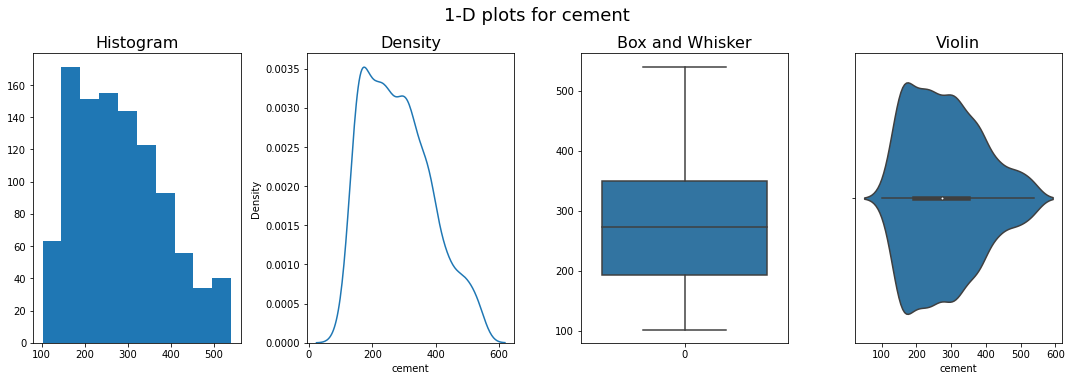

In [28]:
col = 'cement'

plt.figure(figsize=(15,5))
plt.suptitle('1-D plots for %s' %col,size=18,y=1.05)

plt.subplot(141)
plt.hist(df[col])
plt.title('Histogram',size=16)

plt.subplot(142)
sns.kdeplot(data = df[col])
plt.title('Density',size=16)

plt.subplot(143)
sns.boxplot(data = df[col])
plt.title('Box and Whisker',size=16)

plt.subplot(144)
sns.violinplot(x = df[col])
plt.title('Violin',size=16)

plt.tight_layout()

Text(0, 0.5, 'Compressive Strength (MPa)')

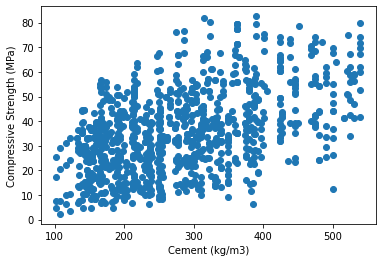

In [39]:
# Scatter plot
x = df['cement']
y = df['csMPa']

plt.scatter(x,y)
plt.xlabel('Cement (kg/m3)')
plt.ylabel('Compressive Strength (MPa)')


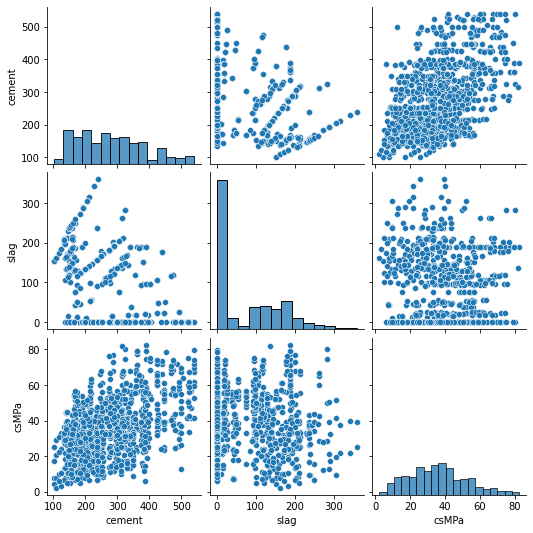

In [40]:
sns.pairplot(df[['cement','slag','csMPa']])

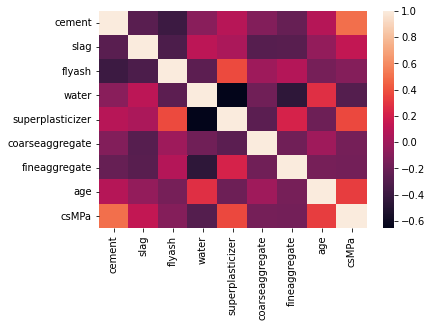

In [41]:
sns.heatmap(df.corr())

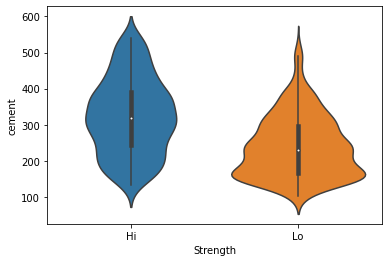

In [42]:
df['Strength'] = np.where(df['csMPa'] > 35.0,'Hi','Lo')
sns.violinplot(x = df['Strength'],y = df['cement'])

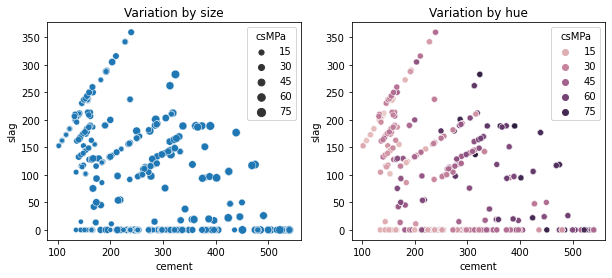

In [43]:
x = df['cement']
y = df['slag']
z = df['csMPa']

plt.figure(figsize=(10,4))
plt.subplot(121)
sns.scatterplot(x = x,y = y,size=z)
plt.title('Variation by size')

plt.subplot(122)
sns.scatterplot(x = x,y = y,hue=z)
plt.title('Variation by hue')
plt.show()

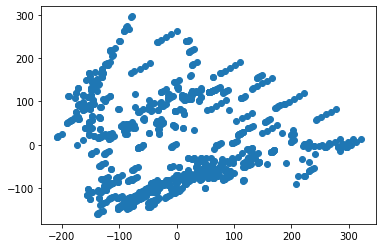

In [44]:
pca = PCA(n_components=2)
pca_data = df[df.columns[:-2]].values
principal_components = pca.fit_transform(pca_data)

x = principal_components[:,0]
y = principal_components[:,1]
plt.scatter(x,y)
plt.show()

In [45]:
x = df['cement']
y = df['slag']
z = df['flyash']

fig = go.Figure(data=[go.Scatter3d(x=x, y=y, z=z,
                                   mode='markers')])

fig.update_layout(scene = dict(
                    xaxis_title='cement',
                    yaxis_title='slag',
                    zaxis_title='flyash'))

fig.show()